# HW 5-3. Unsupervised learning

In this part, you will implement a clustering algorithm, and a dimensionality reduction method, that is:

- K-means
- PCA

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from YourAnswer import *

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## 1. K-means

In [2]:
n_dim = 2
x, y = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)


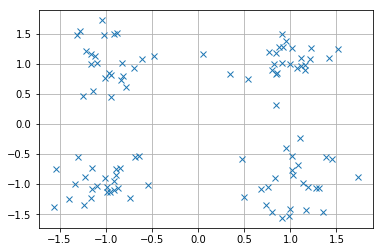

In [3]:
plt.figure()
plt.plot(x[:,0], x[:,1], 'x')
plt.grid(True)
plt.show()

In [4]:
K=4

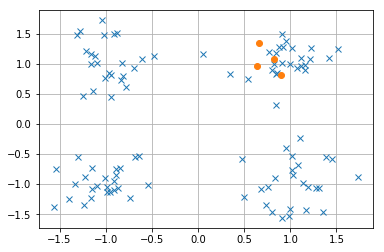

In [5]:
# Initial guess.  We don't want to have our guess horribly far away from the dataset.
np.random.seed(0)
c = np.random.rand(K, n_dim) * 1.5
plt.figure()
plt.plot(x[:,0], x[:,1], 'x')
plt.plot(c[:,0], c[:,1], 'o')
plt.grid(True)
plt.show()

In [6]:
colors = ['r', 'g', 'b', 'k', 'm']

def plot_clusters(x, c, Z, K):
    plt.figure()
    for kk in range(K):
        plt.plot(x[Z == kk,0], x[Z == kk,1], colors[kk]+'x')
        plt.plot(c[kk,0], c[kk,1], colors[kk]+'o')
    plt.grid(True)
    plt.show()

### First step : Membership update

Assign cluster membership.
For each data, we should find the closest centroid point.

*Instruction*: Implement `assign` in `YourAnswer.py` file.

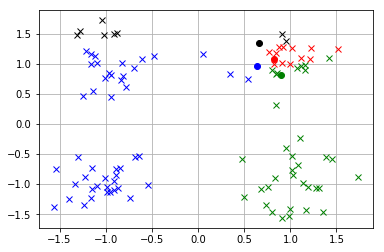

In [7]:
Z = assign(c, x)
plot_clusters(x, c, Z, K)

### Second step : Centroid update

Update the cluster centroid.New centroids are the average of the data points in each cluster.


*Instruction*: Implement `update_centroid` in `YourAnswer.py` file.

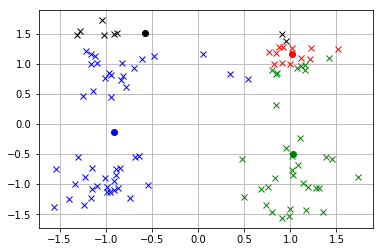

In [8]:
c = update_centroid(Z, c, x, K)
plot_clusters(x, c, Z, K)

### Repeats the process


*Instruction*: Implement `kmeans` in `YourAnswer.py` file.

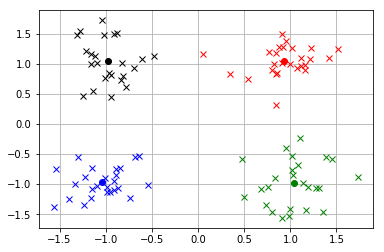

In [9]:
c, Z = kmeans(x, K)
plot_clusters(x, c, Z, K)

### How do we choose K?

K-means has an optimization objective

$$ J(c^{(1)}, ..., c^{(n)}, \mu_1, ...,\mu_K) = \frac{1}{n} \sum_{i=1}^n ||{x^{(i)}} -\mu_{c^{(i)}}||_2^2 $$
Run K-means multiple times with random initialization and pick the best K that gave lowest cost J


*Instruction*: Implement `K_validate` in `YourAnswer.py` file.

We can choose the best K by choosing the "elbow"

Text(0,0.5,'Cost function J')

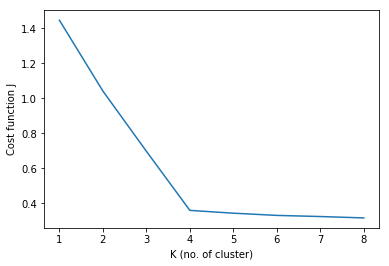

In [10]:
K_range = np.arange(1, 9)
cost = K_validate(x, K_range)
plt.figure()
plt.plot(K_range, cost)
plt.xlabel('K (no. of cluster)')
plt.ylabel('Cost function J')

## 2. PCA

X.shape :  (6977, 361)


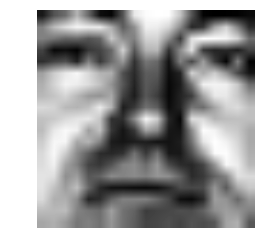

In [11]:
X = open('faces.txt').readlines()
X = np.array([[float(yy) for yy in xx.split()[:-1]] for xx in X[2:] if xx.strip() != ""])
print ('X.shape : ',X.shape)
plt.imshow(X[100].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
plt.axis('off')
plt.show()

### SVD and PCA

In [12]:
# We would reduce the dimension of X to 49
n_comp = 49

(N, d) = X.shape
q = n_comp
    

print ("Dimension of X :",  d)
print ("The number of data in X :", N)
print ("Dimension to reduce", q)

Dimension of X : 361
The number of data in X : 6977
Dimension to reduce 49


We will do PCA using matrix factorization, SVD.

Refer to lecture note & this page:
https://en.wikipedia.org/wiki/Principal_component_analysis - Singular value decomposition

*Instruction*: Implement `SVD` in `YourAnswer.py` file.

The first elements of eigen value and eigen vector should be:

`
e_val:  680761.0408258896
e_vec:  [ 0.0410398  -0.03941244  0.06837621  0.0700664  -0.06385108]`

In [13]:
e_val, e_vec = SVD(X)
print ("e_val: ", e_val[0])
print ("e_vec: ", e_vec[0][:5])

e_val:  680761.0408258887
e_vec:  [ 0.0410398  -0.03941244  0.06837621  0.0700664  -0.06385108]


In [14]:
# select top_e_vec with the number of component(=q)
top_e_vec = e_vec[:,:q]

loadings = np.transpose(top_e_vec)
loadings.shape

(49, 361)


*Instruction*: Implement `PCA` in `YourAnswer.py` file.

The value of first 5 element of vector Z should be:


In [15]:
print(top_e_vec.shape, X.shape)
Z = np.zeros((X.shape[0],top_e_vec.shape[1]))
temp = np.zeros((top_e_vec.shape[1],X.shape[0]))
print(Z.shape, temp.shape)
Z = X.dot(top_e_vec)
print(Z)

print( np.sum(e_val[:49]) / np.sum(e_val))


(361, 49) (6977, 361)
(6977, 49) (49, 6977)
[[ 1.00659859e+01 -5.10878153e-01 -2.49546712e-02 ... -9.57775840e-02
   1.46657209e-01 -4.69836690e-01]
 [ 1.00760372e+01 -6.70209714e-01  6.22822641e-02 ... -6.08920430e-01
   9.01251370e-02 -2.94173204e-01]
 [ 1.00958824e+01 -8.17334043e-01 -1.26050319e-01 ... -5.51577657e-01
  -2.14497550e-01 -1.32104400e-01]
 ...
 [ 9.97146325e+00 -1.05472150e+00  2.47601472e-01 ...  2.84774779e-01
  -5.86147916e-03 -1.21884343e-01]
 [ 1.01033228e+01 -2.44897569e+00  1.47542449e+00 ... -5.72036433e-02
   1.18421162e-01  1.25729528e-02]
 [ 1.01572340e+01 -2.63689536e+00 -1.46344703e+00 ... -1.47412394e-02
  -2.23456316e-01  1.33165621e-02]]
0.9679556491351563


In [16]:
Z = PCA(X, top_e_vec)

print ("Z.shape should be (6977, 49)")
print("Z.shape : ", Z.shape)

Z.shape should be (6977, 49)
Z.shape :  (6977, 49)


In [17]:
Z[0][:5]

array([10.06598587, -0.51087815, -0.02495467, -2.023566  ,  1.01722858])

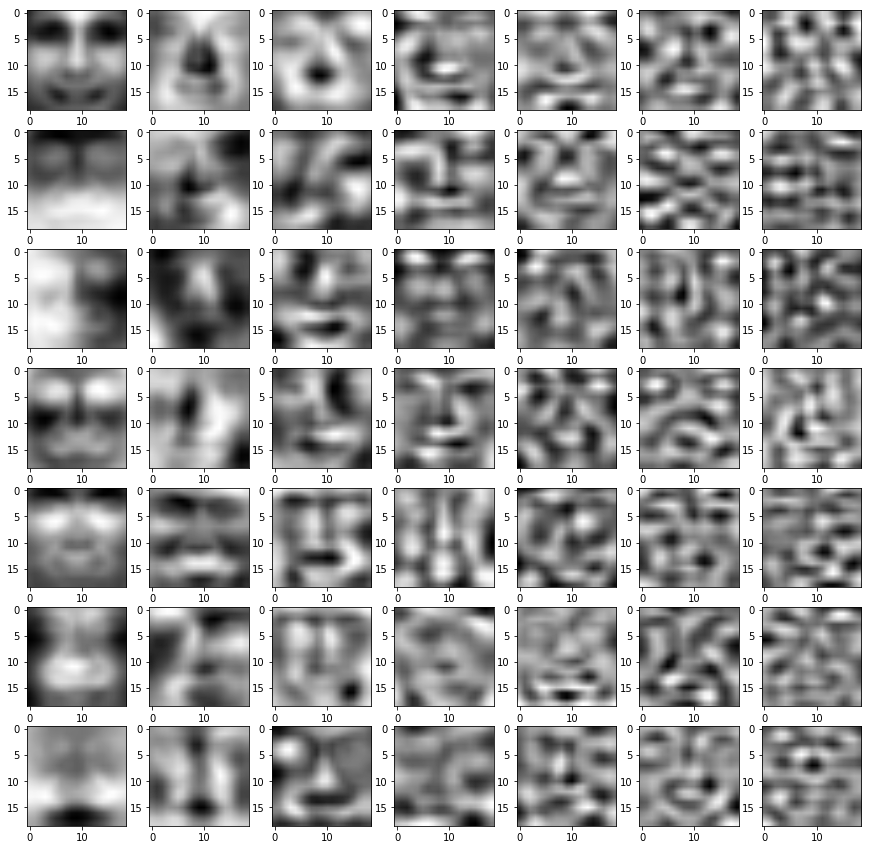

In [18]:
f, axarr = plt.subplots(int(np.sqrt(n_comp)), int(np.sqrt(n_comp)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(n_comp))):
    for i in range(int(np.sqrt(n_comp))):
        axarr[i, j].imshow(loadings[comp_ix].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
        comp_ix += 1

### Reconstruction of image

In [19]:
reconstruction_err = np.linalg.norm( X - Z @ loadings )
print ('Reconstructions error: ', reconstruction_err)

Reconstructions error:  166.92271436852553


In [20]:
# Let's visualize one of the reconstructed image 
sample_index = 100
X_sample_rec_pca = np.dot(Z[sample_index], loadings)

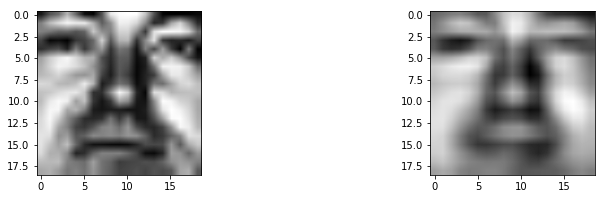

In [21]:
# Left is the real image, Right is the reconstructed image with PCA features
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[sample_index,:].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_pca.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")